<a href="https://colab.research.google.com/github/priyarane879/Hotel-Booking-Analysis/blob/main/Priya_Naik_Hotel_Booking_Analysis_EDA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -Priya Nilesh Naik


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset contains information of hotel booking from 2015 to 2017. There are two types of hotel , city hotel and resort hotel. This dataset include information as when the booking was done, number of adult, children, babies, stay period , country,is guest repeated, room type , deposite type etc.
I have to analyze the data and find the important factors which are responsible for bookings.

#### **Define Your Business Objective?**

Main Objective is to perform exploratory data analysis on dataset and pull out meaningful conclusion about incline in booking and important factors which are responsible for bookings.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:

# Import Libraries

import more_itertools
import numpy as np
import pandas as pd
from numpy import math
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
#setting maximum display column to 32
pd.set_option('display.max_columns', 32)

In [3]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load Dataset
dataset_hotel = pd.read_csv('/content/drive/MyDrive/Almabetter/Project/Eda/Hotel Bookings.csv')

### Dataset First View

In [5]:
# Dataset First Look
# checking 1st 5 row of dataframe
dataset_hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# checking last 5 row of dataframe
dataset_hotel.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
#dataframe.shape function gives us number of column and rows.
dataset_hotel.shape

(119390, 32)

*  Hotel dataset contain 119390 rows and 32 column.

### Dataset Information

In [8]:
# Dataset Info
#using info method we get information about columns, its dtypes, number of entries , number of non-null values.
dataset_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
#Checking for duplicate rows in dataframe
len(dataset_hotel[dataset_hotel.duplicated()])

31994

*   There are 31994 rows which are duplicated.

In [10]:
print(f"From the total data {round(len(dataset_hotel[dataset_hotel.duplicated()])*100/len(dataset_hotel),2)} % are duplicate data.")

From the total data 26.8 % are duplicate data.


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
# Count of missing values of each column
dataset_hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
# Count missing values in the dataset
print(dataset_hotel.isnull().values.sum())

129425


*   In this dataset agent, company,children,country column contain null values.
*   There are total 129425 missing values.

<Axes: >

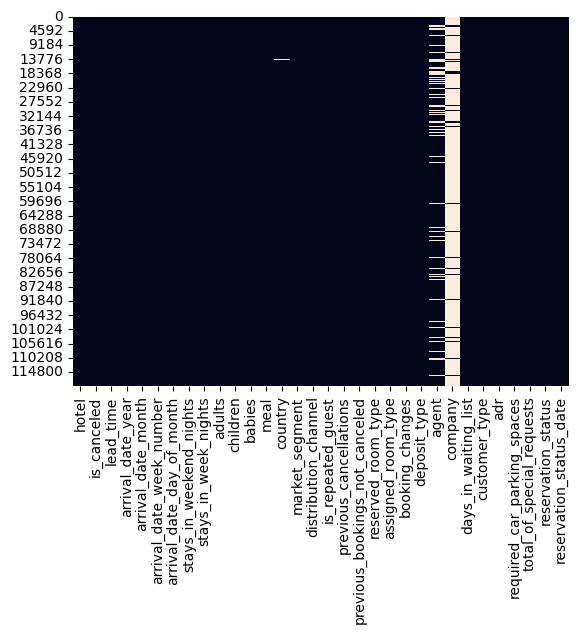

In [13]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset_hotel.isnull(), cbar=False)

### What did you know about your dataset?

1. Dataset contain 119390 rows and 32 column. 10 columns have categorical value and 22 are having numerical value, but from that 31994 rows are duplicated  (almost 27%) .
2. There were 4 columns( agent, country, children and company) are having missing values. Total 94786 missing values was there in dataset.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
dataset_hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [15]:
# Dataset Describe
dataset_hotel.describe(include='all')# describe will generate descriptive statistics of each column

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


### Variables Description

1.   hotel :- It contain type of hotel (Categorical).
2.   is_canceled :- It contains information about booking is cancelled (1) or not (0) (Numeric).
3.   lead_time :- It means number of days that elapsed between the entering date of the booking into the PMS and the arrival date(Numeric).
4.   arrival_date_year :- It is year of arrival date (Numeric).
5.   arrival_date_month :- It is month of arrival date(Numeric).             
6.   arrival_date_week_number:-It is weak number of arrival date(Numeric).
7.   arrival_date_day_of_month:- It is day number of arrival date(Numeric).  
8.   stays_in_weekend_nights:- It is number of weekend(i.e. only on staurday and sunday) nights customer booked to stay in the hotel(Numeric).      
9.   stays_in_week_nights:-It is number of weekend(i.e. from  Monday to saturday) nights customer booked to stay in the hotel(Numeric)
10.  adults:-It is number of adult(Numeric).                        
11.  children:- It is number of children(Numeric)
12.  babies :- It is number of babies(Numeric)
13.  meal:- It is option for meal(Categorical).                           
14.  country:-It is code for country(Categorical).
15.  market_segment:-It is the value for customer from which segment it belong to.(Categorical).
16.  distribution_channel :-How the customer accessed the stay(Categorical).              
17.  is_repeated_guest:-Is this customer is repeated(Numeric).  
18.  previous_cancellations:- Number of previous cancellation of booking by customer(Numeric).           
19.  previous_bookings_not_canceled:- Number of previous booking which are not cancelled(Numeric).  
20.  reserved_room_type:- Type of room reserved(Categorical)             
21.  assigned_room_type :- Type of room assigned to customer(Categorical)             
22.  booking_changes :- Number of changes made to booking(Numeric).                
23.  deposit_type:- Type of deposit(Categorical)                    
24.  agent:- Booked through agent(Numeric).                          
25.  company:- Name of company(Numeric).                         
26.  customer_type:- Type of customer (Categorical)                 
27.  adr:-It is average daily rate(Numeric)                             
28.  required_car_parking_spaces:- Number of car parking required for customer(Numeric).    
29.  total_of_special_requests:- Number of additional special requirement(Numeric).      
30.  reservation_status:- Status of reservation (Categorical).            
31.  reservation_status_date:- Date of the specific status(Categorical)
32. days_in_waiting_list :- Number of days in waiting list(Numeric).

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for i in dataset_hotel.columns.tolist():
  print("No. of unique values in ",i,"is",dataset_hotel[i].nunique(),".")   #nunique gives no. of distinct elements in each column.

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 177 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

## 3. ***Data Wrangling***

### Data Wrangling Code

In [17]:
# Write your code to make your dataset analysis ready.

#### 3.1 Removing duplicate data

In [18]:
#removing duplicate rows
dataset_hotel=dataset_hotel.drop_duplicates()

#### 3.2 Handling Null Values

#####3.2.1 Handling Null Values in 'Children' Column

In [19]:
# This will gives us no. of occurance of each unique value from column children.
dataset_hotel['children'].value_counts()

0.0     79028
1.0      4695
2.0      3593
3.0        75
10.0        1
Name: children, dtype: int64

##### Here mode value of children column is 0, I will replace null value with 0.

In [20]:
# filling a null values in children  with 0 using fillna()
dataset_hotel["children"].fillna(0, inplace = True)

##### 3.2.2 Handling Null Values in 'Country' Column

In [21]:
dataset_hotel['country'].value_counts() # It will gives us no. of occurance of each unique value from column country.

PRT    27453
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
MMR        1
BFA        1
CYM        1
MLI        1
KHM        1
Name: country, Length: 177, dtype: int64

Here I will replace null value with "NoCountry" value.

In [22]:
# filling a null values using fillna()
dataset_hotel["country"].fillna("Nocountry", inplace = True)# replacing null value with "Nocountry".

##### 3.2.3 Handling Null Values in 'Agent' Column

In [23]:
dataset_hotel['agent'].value_counts()  # It will gives us no. of occurance of each unique value from column agent.

9.0      28759
240.0    13028
14.0      3349
7.0       3300
250.0     2779
         ...  
497.0        1
337.0        1
510.0        1
165.0        1
449.0        1
Name: agent, Length: 333, dtype: int64

Here I will replace null value with "0" value.

In [24]:
# filling a null values in agent  with 0 using fillna()
dataset_hotel["agent"].fillna(0, inplace = True) #replacing null value with 0.

#####3.2.4 Handling Null Values in 'Company' Column

In [25]:
dataset_hotel['company'].value_counts()   # It will gives us no. of occurance of each unique value from company agent.

40.0     851
223.0    503
45.0     238
153.0    206
154.0    133
        ... 
10.0       1
419.0      1
415.0      1
425.0      1
534.0      1
Name: company, Length: 352, dtype: int64

Here I will replace null value with "0" value.

In [26]:
# filling a null values in company  with 0 using fillna()
dataset_hotel["company"].fillna(0, inplace = True)  #replacing null value with 0.

#### 3.3. Changing inappropriate datatype

In [27]:
#changing datatype of column adults, children and babies,company ,agent  from float to interger
dataset_hotel["adults"]=dataset_hotel["adults"].astype('int64')
dataset_hotel["children"]=dataset_hotel["children"].astype('int64')
dataset_hotel["babies"]=dataset_hotel["babies"].astype('int64')
dataset_hotel["agent"]=dataset_hotel["agent"].astype('int64')
dataset_hotel["company"]=dataset_hotel["company"].astype('int64')

#### 3.4. Merging column to create new feature

##### 3.4.1 Merging Column:-stays_in_weekend_nights and stays_in_week_nights

In [28]:
# adding stays_in_weekend_nights and stays_in_week_nights to get Total stay
dataset_hotel["Total_stay"]=dataset_hotel["stays_in_weekend_nights"]+dataset_hotel["stays_in_week_nights"]

In [29]:
# finding rows whose total stay is zero and still booking status is not canceled
nostay = dataset_hotel[((dataset_hotel['Total_stay']==0) & (dataset_hotel['is_canceled']==0))].index

In [30]:
len(nostay)

622

* There are 568 rows with total stay is zero and booking status is confirmed

In [31]:
dataset_hotel.drop(nostay , inplace=True)

##### 3.4.2 Merging Column:-adults,children and babies

In [32]:
# merging adults,children,babies to get Total_People
dataset_hotel["Total_People"]=dataset_hotel["adults"]+dataset_hotel["children"]+dataset_hotel["babies"]

In [33]:
# Here I am finding those column with total people zero
nopeople = dataset_hotel[ (dataset_hotel['Total_People'] == 0)].index


In [34]:
len(nopeople)

112

* There are 166 rows with total people is zero.

In [35]:
dataset_hotel.drop(nopeople , inplace=True) # deleting rows which having zero people.

#### 3.5. Removal of outlier

By looking at dataset description, I found that adr contain outlier

<Axes: >

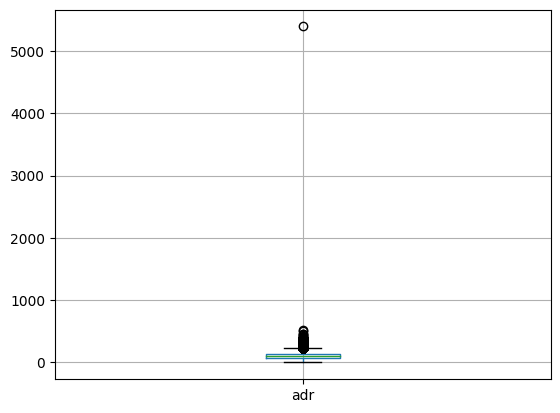

In [36]:
dataset_hotel.boxplot(column="adr") # Make a box plot of adr column.

In [37]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,10):
    var =dataset_hotel["adr"].values
    var = np.sort(var,axis = None)    # sorting 'adr' column value
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))])) #calculating adr values at each percntile 0,10,20,30,40,50,60,70,80,90,100
print ("100 percentile value is ",var[-1])

0 percentile value is -6.38
10 percentile value is 49.0
20 percentile value is 66.0
30 percentile value is 78.0
40 percentile value is 89.0
50 percentile value is 99.0
60 percentile value is 111.0
70 percentile value is 126.0
80 percentile value is 144.0
90 percentile value is 174.4
100 percentile value is  5400.0


* Here we can see there is huge difference between 90th percentile and 100th percentile.

In [38]:
#looking further from the 90th percecntile to 100
for i in range(90,100):
    var =dataset_hotel["adr"].values
    var = np.sort(var,axis = None) # sorting 'adr' column value
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))])) #calculating adr values at each percntile 90,91,92,93,94,95,96,97,98,99,100
print ("100 percentile value is ",var[-1])

90 percentile value is 174.4
91 percentile value is 179.1
92 percentile value is 185.0
93 percentile value is 190.0
94 percentile value is 197.67
95 percentile value is 204.75
96 percentile value is 213.33
97 percentile value is 225.0
98 percentile value is 239.5
99 percentile value is 262.0
100 percentile value is  5400.0


In [39]:
#calculating adr values at each percntile 99.0 to 100
for i in np.arange(0.0, 1.0, 0.1):
    var =dataset_hotel["adr"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))])) #calculating adr values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
print("100 percentile value is ",var[-1])

99.0 percentile value is 262.0
99.1 percentile value is 265.25
99.2 percentile value is 270.0
99.3 percentile value is 273.56
99.4 percentile value is 279.0
99.5 percentile value is 286.0
99.6 percentile value is 293.75
99.7 percentile value is 300.6
99.8 percentile value is 314.5
99.9 percentile value is 335.0
100 percentile value is  5400.0


In [40]:
#removing further outliers based on the 99.99th percentile value
dataset_hotel=dataset_hotel[(dataset_hotel.adr>0 )&(dataset_hotel.adr<=1000)]

<Axes: >

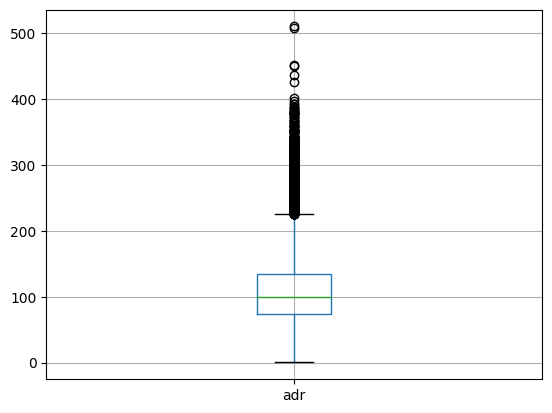

In [41]:
#plotting boxplot for adr after removal of outlier
dataset_hotel.boxplot(column="adr")

### What all manipulations have you done and insights you found?

*   **Removal of Redundant Information**:- As dataset contain 31994 rows duplicated so I simply delete such rows.
*  **Handling missing value** :- There were missing value in children, company, agent, country columns. So I have replace mode value of chidren column i.e. '0' in missing value, also in company and agent I have repalced missing with '0' value and in company missing values are replaced with 'Nocountry' value.
*   **Changing Inappropriate datatype**:- I have changed datatype of  adult, chilldren, babies, agent and company column from float to integer.
* **Merging column to get new feature**:- I have added stays_in_weekend_nights and stays_in_week_nights and got Total_stay as new feature. Also I have added adults,children and babies to get Total_people as new feature.
* **Removal of unwanted rows**:  Removed rows whose total people are zero.
Also removed those column whose total stay is zero and booking status is not cancelled.
* **Removal of outlier**:- There were only one value adr which was very high(5400) so I have removed it.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***